In [1]:
!pip install -q seaborn numpy pandas matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3, suppress=True)

In [230]:
filepath = './Preprocessed_Data.csv'
# column_names = ['date', 'bleaching_level', 'depth_meters', 'clim_SST', 'temperature_kelvin','temperature_mean','temperature_maximum','temperature_minimum','temperature_kelvin_standard_deviation',	'SSTA_standard_deviation','SSTA_mean','SSTA_minimum','SSTA_maximum','SSTA_frequency','SSTA_frequency_standard_deviation','SSTA_frequency_max','SSTA_frequency_mean','SSTA_DHW','SSTA_DHW_standard_deviation','SSTA_DHWMax','SSTA_DHW_mean','TSA','TSA_standard_deviation','TSA_minimum','TSA_maximum','TSA_mean','TSA_frequency','TSA_frequency_standard_deviation','TSA_frequency_max','TSA_frequency_mean','TSA_DHW','TSA_DHW_standard_deviation','TSA_DHW_max','TSA_DHW_mean','severity_code']
schema = {'date': str, 'bleaching_level': str, 'depth_meters': float, 'clim_SST': float, 'temperature_mean': float, 'SSTA_mean': float, 'SSTA_DHW':float, 'TSA':float, 'TSA_DHW':float, 'severity_code': str }
column_names = ['date', 'bleaching_level', 'depth_meters', 'clim_SST', 'temperature_mean', 'SSTA_mean', 'SSTA_DHW', 'TSA', 'TSA_DHW', 'severity_code']
raw_dataset = pd.read_csv(filepath, names=column_names,
                            dtype=schema, parse_dates=['date'],
                          na_values='', comment='\t',
                          sep=',', skipinitialspace=True)
raw_dataset

,date,bleaching_level,depth_meters,clim_SST,temperature_mean,SSTA_mean,SSTA_DHW,TSA,TSA_DHW,severity_code
0,2016-09-08,NaN,5.0,299.48,298.85,0.0,11.50,-0.92,6.88,Severe (>50% Bleached)
1,2016-09-02,NaN,10.0,299.92,298.93,0.0,14.57,-0.03,8.24,Severe (>50% Bleached)
2,2010-06-29,NaN,5.0,302.20,298.93,0.0,0.00,-1.26,0.00,No Bleaching
3,2008-08-05,NaN,5.0,301.76,299.09,0.0,1.30,-2.06,0.00,Moderate (11-50% Bleached)
4,2016-09-02,NaN,13.0,299.86,298.92,0.0,13.64,-0.80,10.78,Severe (>50% Bleached)
...,...,...,...,...,...,...,...,...,...,...
34841,2016-08-19,NaN,9.9,301.47,299.73,0.0,1.30,0.95,0.00,Mild (1-10% Bleached)
34842,2016-09-06,NaN,11.8,300.84,299.69,0.0,4.37,-0.91,1.26,Moderate (11-50% Bleached)
34843,2016-09-06,NaN,12.2,300.84,299.73,0.0,3.14,-0.86,1.02,Mild (1-10% Bleached)
34844,2016-09-14,NaN,5.5,299.86,299.67,0.0,1.73,0.65,1.13,Mild (1-10% Bleached)


In [231]:
# dataset = raw_dataset.copy()
dataset = raw_dataset.filter(['date', 'depth_meters', 'clim_SST', 'temperature_mean', 'SSTA_mean', 'SSTA_DHW', 'TSA', 'TSA_DHW', 'severity_code'], axis=1)
dataset

,date,depth_meters,clim_SST,temperature_mean,SSTA_mean,SSTA_DHW,TSA,TSA_DHW,severity_code
0,2016-09-08,5.0,299.48,298.85,0.0,11.50,-0.92,6.88,Severe (>50% Bleached)
1,2016-09-02,10.0,299.92,298.93,0.0,14.57,-0.03,8.24,Severe (>50% Bleached)
2,2010-06-29,5.0,302.20,298.93,0.0,0.00,-1.26,0.00,No Bleaching
3,2008-08-05,5.0,301.76,299.09,0.0,1.30,-2.06,0.00,Moderate (11-50% Bleached)
4,2016-09-02,13.0,299.86,298.92,0.0,13.64,-0.80,10.78,Severe (>50% Bleached)
...,...,...,...,...,...,...,...,...,...
34841,2016-08-19,9.9,301.47,299.73,0.0,1.30,0.95,0.00,Mild (1-10% Bleached)
34842,2016-09-06,11.8,300.84,299.69,0.0,4.37,-0.91,1.26,Moderate (11-50% Bleached)
34843,2016-09-06,12.2,300.84,299.73,0.0,3.14,-0.86,1.02,Mild (1-10% Bleached)
34844,2016-09-14,5.5,299.86,299.67,0.0,1.73,0.65,1.13,Mild (1-10% Bleached)


In [232]:
# dataset = pd.get_dummies(dataset, columns=['bleaching_level'], prefix='', prefix_sep='')
# dataset = pd.get_dummies(dataset, columns=['severity_code'], prefix='', prefix_sep='')
dataset.severity_code = dataset['severity_code'].map({'No Bleaching':0, '% unknown': 1, 'Mild (1-10% Bleached)': 1, 'Moderate (11-50% Bleached)': 2, 'Severe (>50% Bleached)': 3})
# dataset = pd.get_dummies(dataset, columns=['bleaching_level'], prefix='', prefix_sep='')

# dataset.bleaching_level = dataset['bleaching_level'].map({'NaN': 0, 'Colony': 1, 'Population': 2 })

dataset

,date,depth_meters,clim_SST,temperature_mean,SSTA_mean,SSTA_DHW,TSA,TSA_DHW,severity_code
0,2016-09-08,5.0,299.48,298.85,0.0,11.50,-0.92,6.88,3
1,2016-09-02,10.0,299.92,298.93,0.0,14.57,-0.03,8.24,3
2,2010-06-29,5.0,302.20,298.93,0.0,0.00,-1.26,0.00,0
3,2008-08-05,5.0,301.76,299.09,0.0,1.30,-2.06,0.00,2
4,2016-09-02,13.0,299.86,298.92,0.0,13.64,-0.80,10.78,3
...,...,...,...,...,...,...,...,...,...
34841,2016-08-19,9.9,301.47,299.73,0.0,1.30,0.95,0.00,1
34842,2016-09-06,11.8,300.84,299.69,0.0,4.37,-0.91,1.26,2
34843,2016-09-06,12.2,300.84,299.73,0.0,3.14,-0.86,1.02,1
34844,2016-09-14,5.5,299.86,299.67,0.0,1.73,0.65,1.13,1


In [222]:
dataset.isna().sum()

date                  0
depth_meters          0
clim_SST             98
temperature_mean    113
SSTA_mean           113
SSTA_DHW            129
TSA                 129
TSA_DHW             129
severity_code         0
dtype: int64

In [227]:
dataset = dataset.dropna()
# 'date', 'bleaching_level', 'depth_meters', 'clim_SST', 'temperature_kelvin','temperature_mean','temperature_maximum','temperature_minimum','temperature_kelvin_standard_deviation',	'SSTA_standard_deviation','SSTA_mean','SSTA_minimum','SSTA_maximum','SSTA_frequency','SSTA_frequency_standard_deviation','SSTA_frequency_max','SSTA_frequency_mean','SSTA_DHW','SSTA_DHW_standard_deviation','SSTA_DHWMax','SSTA_DHW_mean','TSA','TSA_standard_deviation','TSA_minimum','TSA_maximum','TSA_mean','TSA_frequency','TSA_frequency_standard_deviation','TSA_frequency_max','TSA_frequency_mean','TSA_DHW','TSA_DHW_standard_deviation','TSA_DHW_max','TSA_DHW_mean','severity_code']

dataset['depth_meters'] = dataset['depth_meters'].astype(np.int64)
dataset['severity_code'] = dataset['severity_code'].astype(np.int64)
dataset['date'] = dataset['date'].astype(np.datetime64) 
# dataset['clim_SST'] = dataset['clim_SST'].astype(np.float32)
# dataset['temperature_kelvin'] = dataset['temperature_kelvin'].astype(np.float32)
# dataset['temperature_maximum'] = dataset['temperature_maximum'].astype(np.float32)
# dataset['temperature_minimum'] = dataset['temperature_minimum'].astype(np.float32)
# dataset['temperature_kelvin_standard_deviation'] = dataset['temperature_kelvin_standard_deviation'].astype(np.float32)
# dataset['SSTA_standard_deviation'] = dataset['SSTA_standard_deviation'].astype(np.float32)
# dataset['SSTA_mean'] = dataset['SSTA_mean'].astype(np.float32)
# dataset['SSTA_minimum'] = dataset['SSTA_minimum'].astype(np.float32)
# dataset['SSTA_maximum'] = dataset['SSTA_maximum'].astype(np.float32)
# dataset['SSTA_frequency'] = dataset['SSTA_frequency'].astype(np.float32)
# dataset['SSTA_frequency_standard_deviation'] = dataset['SSTA_frequency_standard_deviation'].astype(np.float32)
# dataset['SSTA_frequency_max'] = dataset['SSTA_frequency_max'].astype(np.float32)
# dataset['SSTA_frequency_mean'] = dataset['SSTA_frequency_mean'].astype(np.float32)
# dataset['SSTA_DHW'] = dataset['SSTA_DHW'].astype(np.float32)
# dataset['SSTA_DHW_standard_deviation'] = dataset['SSTA_DHW_standard_deviation'].astype(np.float32)
# dataset['SSTA_DHWMax'] = dataset['SSTA_DHWMax'].astype(np.float32)
# dataset['SSTA_DHW_mean'] = dataset['SSTA_DHW_mean'].astype(np.float32)
# dataset['TSA'] = dataset['TSA'].astype(np.float32)
dataset

TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.

In [233]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [234]:
train_dataset['date'][0].dtype

AttributeError: 'Timestamp' object has no attribute 'dtype'

<Axes: xlabel='date', ylabel='severity_code'>

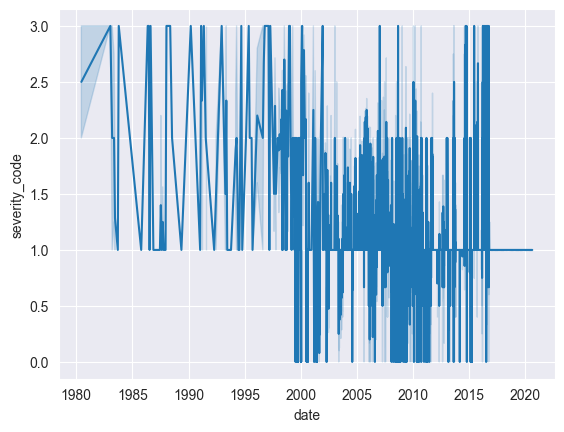

In [240]:
# sns.pairplot(train_dataset[['date', 'severity_code', 'depth_meters', 'temperature_mean', 'TSA', 'clim_SST', 'SSTA_DHW']], diag_kind='kde')
# a = sns.lmplot(
#     data=train_dataset,
#     x="SSTA_DHW", y="clim_SST", hue="severity_code",
#     height=5
# )
# b = sns.lmplot(
#   data=train_dataset,
#   x="SSTA_DHW", y="clim_SST", hue="severity_code",
#   height=5
# )
# c = sns.lmplot(
#   data=train_dataset,
#   x="date", y="temperature_mean", hue="severity_code",
#   height=5
# )
sns.lineplot(x = "date", y = "severity_code", data = train_dataset)


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('severity_code')
test_labels = test_features.pop('severity_code')

train_dataset.describe().transpose()
train_dataset.describe().transpose()[['mean', 'std']]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())
